In [2]:
import requests
from bs4 import BeautifulSoup
import regex as re
from sklearn.linear_model import LinearRegression
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt

URL = 'https://www.worldometers.info/coronavirus/'
page = requests.get(URL)
soup = BeautifulSoup(page.content,'html.parser')

In [3]:
# <script> which contains Total Cases data
script = soup.find('script', text=re.compile(r'Total Cases'))  # type='text/javascript'
script

<script type="text/javascript">
    Highcharts.chart('coronavirus-cases-linear', {
        chart: {
            type: 'line'
        },
        title: {
            text: 'Total Cases'
        },

        subtitle: {
            text: '(Linear Scale)'
        },

        xAxis: {
            categories: ["Jan 22","Jan 23","Jan 24","Jan 25","Jan 26","Jan 27","Jan 28","Jan 29","Jan 30","Jan 31","Feb 01","Feb 02","Feb 03","Feb 04","Feb 05","Feb 06","Feb 07","Feb 08","Feb 09","Feb 10","Feb 11","Feb 12","Feb 13","Feb 14","Feb 15","Feb 16","Feb 17","Feb 18","Feb 19","Feb 20","Feb 21","Feb 22","Feb 23","Feb 24","Feb 25","Feb 26","Feb 27","Feb 28","Feb 29","Mar 01","Mar 02","Mar 03","Mar 04","Mar 05","Mar 06","Mar 07","Mar 08","Mar 09","Mar 10","Mar 11","Mar 12","Mar 13","Mar 14","Mar 15","Mar 16","Mar 17","Mar 18","Mar 19","Mar 20","Mar 21","Mar 22","Mar 23","Mar 24","Mar 25","Mar 26","Mar 27","Mar 28","Mar 29","Mar 30","Mar 31","Apr 01","Apr 02","Apr 03","Apr 04","Apr 05","Apr 06","Apr 07","

In [4]:
# First match of the 'categories' list contains the Total Cases date labels
data = re.findall("categories: \[.*\]", script.string)[0]

# Trim string to only the list data
date_totalcases_str = data[13:-1]

# Convert string to list and remove "" surrounding each element
dates = [elem[1:-1] for elem in date_totalcases_str.split(',')]

dates

['Jan 22',
 'Jan 23',
 'Jan 24',
 'Jan 25',
 'Jan 26',
 'Jan 27',
 'Jan 28',
 'Jan 29',
 'Jan 30',
 'Jan 31',
 'Feb 01',
 'Feb 02',
 'Feb 03',
 'Feb 04',
 'Feb 05',
 'Feb 06',
 'Feb 07',
 'Feb 08',
 'Feb 09',
 'Feb 10',
 'Feb 11',
 'Feb 12',
 'Feb 13',
 'Feb 14',
 'Feb 15',
 'Feb 16',
 'Feb 17',
 'Feb 18',
 'Feb 19',
 'Feb 20',
 'Feb 21',
 'Feb 22',
 'Feb 23',
 'Feb 24',
 'Feb 25',
 'Feb 26',
 'Feb 27',
 'Feb 28',
 'Feb 29',
 'Mar 01',
 'Mar 02',
 'Mar 03',
 'Mar 04',
 'Mar 05',
 'Mar 06',
 'Mar 07',
 'Mar 08',
 'Mar 09',
 'Mar 10',
 'Mar 11',
 'Mar 12',
 'Mar 13',
 'Mar 14',
 'Mar 15',
 'Mar 16',
 'Mar 17',
 'Mar 18',
 'Mar 19',
 'Mar 20',
 'Mar 21',
 'Mar 22',
 'Mar 23',
 'Mar 24',
 'Mar 25',
 'Mar 26',
 'Mar 27',
 'Mar 28',
 'Mar 29',
 'Mar 30',
 'Mar 31',
 'Apr 01',
 'Apr 02',
 'Apr 03',
 'Apr 04',
 'Apr 05',
 'Apr 06',
 'Apr 07',
 'Apr 08',
 'Apr 09',
 'Apr 10',
 'Apr 11',
 'Apr 12',
 'Apr 13',
 'Apr 14',
 'Apr 15',
 'Apr 16',
 'Apr 17',
 'Apr 18',
 'Apr 19',
 'Apr 20',
 'Apr 21',

In [5]:
# First match of the 'data' list contains the Total Cases data
data = re.findall("data: \[.*\]\s", script.string)[0]

# Trim string to only the list data
cases_totalcases_str = data[7:-2]

# Convert string to int list
number_cases = [int(elem) for elem in cases_totalcases_str.split(',')]

number_cases

[607,
 874,
 1347,
 2046,
 2832,
 4616,
 6094,
 7854,
 9865,
 11995,
 14622,
 17476,
 20729,
 24656,
 28384,
 31568,
 35021,
 37706,
 40709,
 43282,
 45332,
 59511,
 64687,
 67369,
 69501,
 71658,
 73689,
 75569,
 76103,
 77136,
 78195,
 79232,
 79861,
 80855,
 81719,
 82859,
 84319,
 86143,
 88351,
 90995,
 93623,
 96942,
 100136,
 104450,
 109587,
 115378,
 121316,
 128598,
 137433,
 148817,
 162214,
 178917,
 196220,
 215590,
 236274,
 259298,
 286402,
 318361,
 357135,
 390750,
 427425,
 472011,
 517025,
 566211,
 627981,
 694649,
 762158,
 823371,
 888460,
 964251,
 1043044,
 1124490,
 1211237,
 1295108,
 1369537,
 1447548,
 1531859,
 1621336,
 1712227,
 1810689,
 1896888,
 1973936,
 2051046,
 2131494,
 2218538,
 2306335,
 2396113,
 2480995,
 2559822,
 2642818,
 2724663,
 2808881,
 2895555,
 2994164,
 3085749,
 3160521,
 3232344,
 3310602,
 3392121,
 3481440,
 3577725,
 3661571,
 3744768,
 3827381,
 3910951,
 4008206,
 4105435,
 4202533,
 4291736,
 4372716,
 4447236,
 4535872,
 46

In [6]:
x = np.arange(len(number_cases))
y = np.array(number_cases)

In [7]:
x = x.reshape(-1,1)

In [8]:
lr = LinearRegression() 
lr.fit(x, y)

LinearRegression()

In [9]:
x_new = np.linspace(0, 350, 100)
y_new = lr.predict(x_new[:, np.newaxis])

Text(0.5, 1.0, 'Casos totales')

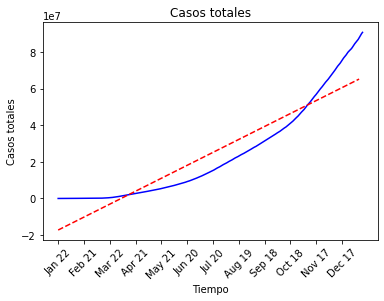

In [16]:
ax = plt.axes()
x_ticks = np.arange(len(dates))
plt.xticks(x_ticks, dates, rotation=45)
plt.locator_params(axis='x', nbins=12)

ax.plot(x, y, color="blue")
ax.plot(x_new, y_new, color="red",  linestyle='dashed')
ax.set_ylabel('Casos totales')
ax.set_xlabel('Tiempo')
plt.title('Casos totales')